In [3]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv("../../data/data_reg.csv")

In [7]:
data.columns

Index(['Rup', 'M', 'R', 'log(R)', 'log(VS30)', 'focal_mech', 'PGA'], dtype='object')

In [ ]:
data[]

In [137]:
X = data[['Rup', 'M', 'R', 'log(R)', 'log(VS30)', 'focal_mech']]
y = np.log(data['PGA'])

In [138]:
model = LinearRegression().fit(X, y)

In [143]:
import pandas as pd

def model_summary(model, X):
    coef_names = ['Intercept'] + list(X.columns)
    coefficients = [model.intercept_] + list(model.coef_)
    summary = pd.DataFrame({'Coefficient Name': coef_names, 'Coefficient Value': coefficients})
    return summary

# Usage:
summary = model_summary(model, X)
print(summary)


  Coefficient Name  Coefficient Value
0        Intercept          -2.005233
1              Rup          -0.003658
2                M           1.442803
3                R          -0.000329
4           log(R)          -1.582417
5        log(VS30)          -0.416320
6       focal_mech          -0.032980


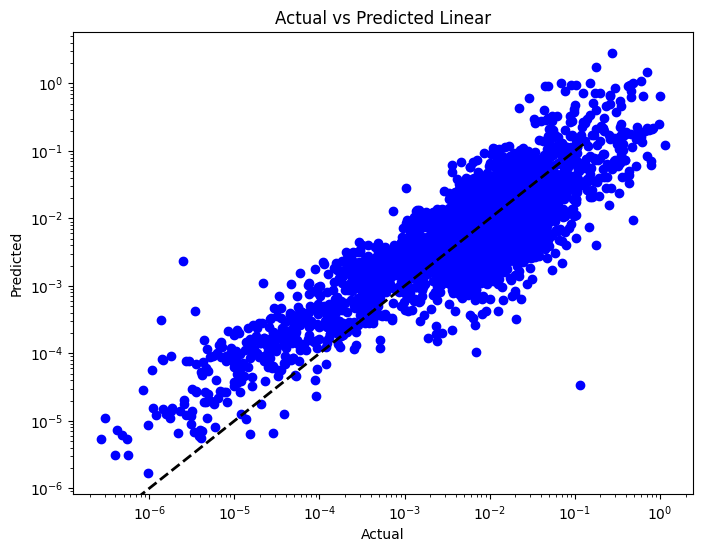

In [140]:
import matplotlib.pyplot as plt

# Get predicted values
predicted_values = model.predict(X)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(np.exp(y), np.exp(predicted_values), color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Linear')
plt.show()

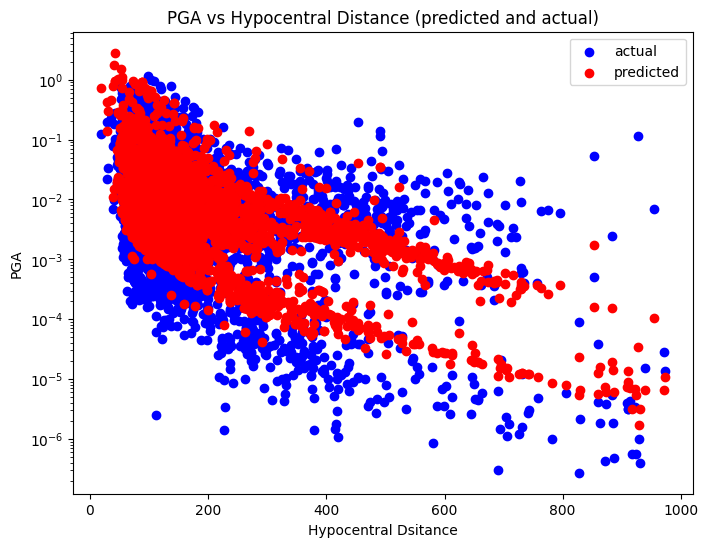

In [141]:
plt.figure(figsize=(8, 6))
plt.scatter(data["R"], np.exp(y), color='blue', label = "actual")
plt.scatter(data["R"], np.exp(predicted_values), color='red', label = "predicted")
plt.legend()
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Hypocentral Dsitance')
plt.ylabel('PGA')
plt.title('PGA vs Hypocentral Distance (predicted and actual)')
plt.show()

In [146]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y, predicted_values)
print("R^2 Score:", r2)

# Print coefficients along with their significance (assuming significance based on coefficient values)
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"{X.columns[i]}: {coef}")


R^2 Score: 0.6931009037667233
Coefficients:
Rup: -0.0036575124081760883
M: 1.442803150095132
R: -0.00032884589740622775
log(R): -1.5824167401374414
log(VS30): -0.4163202884991279
focal_mech: -0.03298006986349714


In [28]:
from sklearn.metrics import mean_squared_error

In [86]:
mse = mean_squared_error(y, predicted_values)

print("Mean Squared Error:", mse)

Mean Squared Error: 1.1287051967455537


In [93]:
data["PGA"]

0       0.001031
1       0.000049
2       0.000090
3       0.001031
4       0.000020
          ...   
5109    0.000044
5110    0.000050
5111    0.000044
5112    0.000204
5113    0.000033
Name: PGA, Length: 5114, dtype: float64

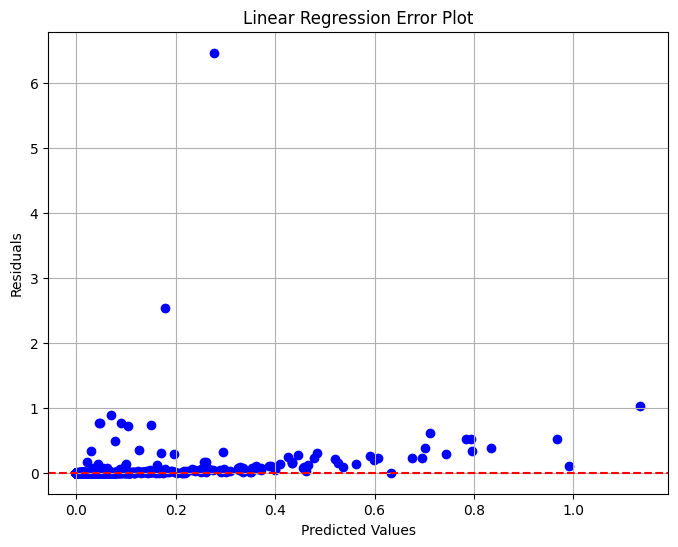

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_true contains the true values and y_pred contains the predicted values

# Calculate the residuals
residuals = (np.exp(y) - np.exp(predicted_values))**2

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(np.exp(y), residuals, color='blue')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# plt.yscale('log')
plt.title('Linear Regression Error Plot')
plt.grid(True)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [34]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [153]:
X = data[['Rup', 'M', 'R', 'log(R)', 'log(VS30)', 'focal_mech']]
y = np.log(data['PGA'])

In [154]:
import statsmodels.api as sm

# Construct the mixed-effects model
mixed_lm = sm.MixedLM(y, X, data["focal_mech"])

# Fit the model
mixed_lm_fit = mixed_lm.fit()

# Print the summary
print(mixed_lm_fit.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PGA       
No. Observations: 5114    Method:             REML      
No. Groups:       5       Scale:              1.0953    
Min. group size:  281     Log-Likelihood:     -7524.9213
Max. group size:  1625    Converged:          Yes       
Mean group size:  1022.8                                
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Rup          -0.004    0.002  -2.025 0.043 -0.007 -0.000
M             1.397    0.021  65.450 0.000  1.355  1.439
R            -0.000    0.002  -0.019 0.985 -0.004  0.004
log(R)       -1.618    0.073 -22.119 0.000 -1.761 -1.474
log(VS30)    -0.421    0.034 -12.420 0.000 -0.487 -0.354
focal_mech   -0.641    0.231  -2.777 0.005 -1.093 -0.189
Group Var     1.104    0.873                            



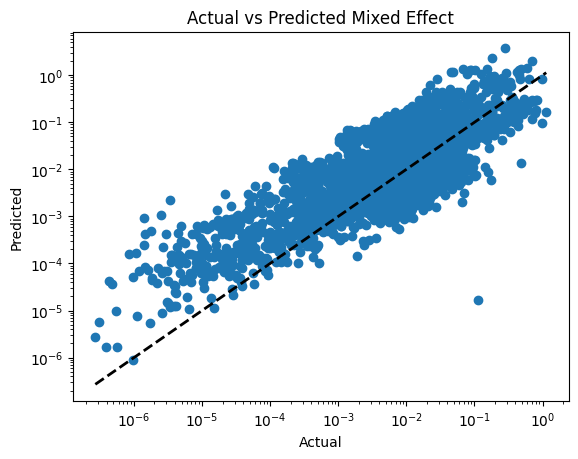

In [155]:
# Get the predicted values
predicted_values = mixed_lm_fit.predict()

# Plot actual vs predicted
plt.scatter(np.exp(y), np.exp(predicted_values))
plt.plot([np.exp(y).min(), np.exp(y).max()], [np.exp(y).min(), np.exp(y).max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Mixed Effect')
plt.show()


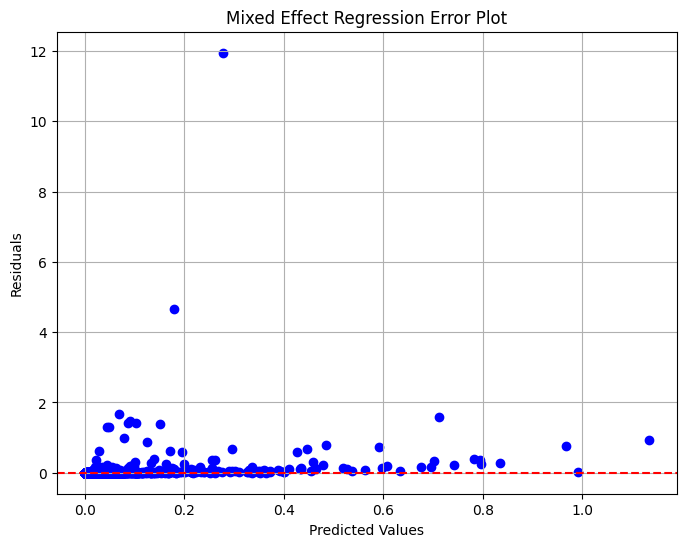

In [165]:
# Calculate the residuals
residuals = (np.exp(y)- np.exp(predicted_values))**2

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(np.exp(y), residuals, color='blue')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Mixed Effect Regression Error Plot')
plt.grid(True)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [158]:
mse = mean_squared_error(y, predicted_values)

print("Mean Squared Error:", mse)

Mean Squared Error: 1.8963287162122882


In [159]:
RMSE = np.sqrt(((np.exp(y) - np.exp(predicted_values))**2).values.mean())

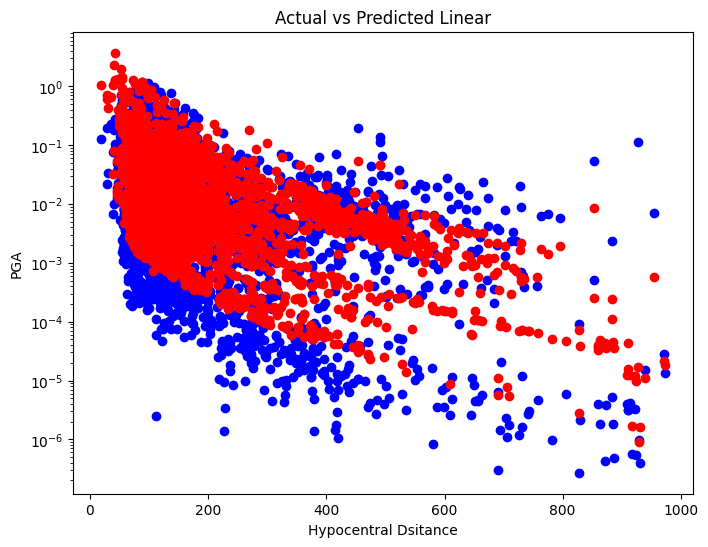

In [160]:
plt.figure(figsize=(8, 6))
plt.scatter(data["R"], np.exp(y), color='blue')
plt.scatter(data["R"], np.exp(predicted_values), color='red')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Hypocentral Dsitance')
plt.ylabel('PGA')
plt.title('Actual vs Predicted Linear')
plt.show()

In [161]:
# from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y, predicted_values)
print("R^2 Score:", r2)

# Print coefficients along with their significance (assuming significance based on coefficient values)



R^2 Score: 0.4843812442391382
